*November, 12th, 2024*

**S22**

### **IMPORTANT NOTE:** If you are accessing this notebook directly in Colab, do not forget to create a copy and work in your own file. You can do this by selecting:

### **FILE -> Save a copy in Drive**

### This will save a copy in your own Drive space.

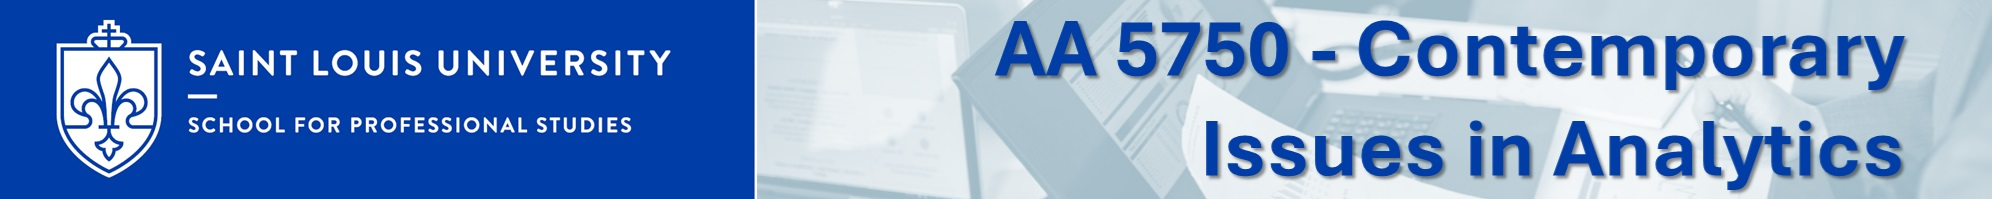

# **Week 4. Convolutional Neural Networks and Image Recognition II.**
## **REGULARIZATION AND TRANSFER LEARNING**

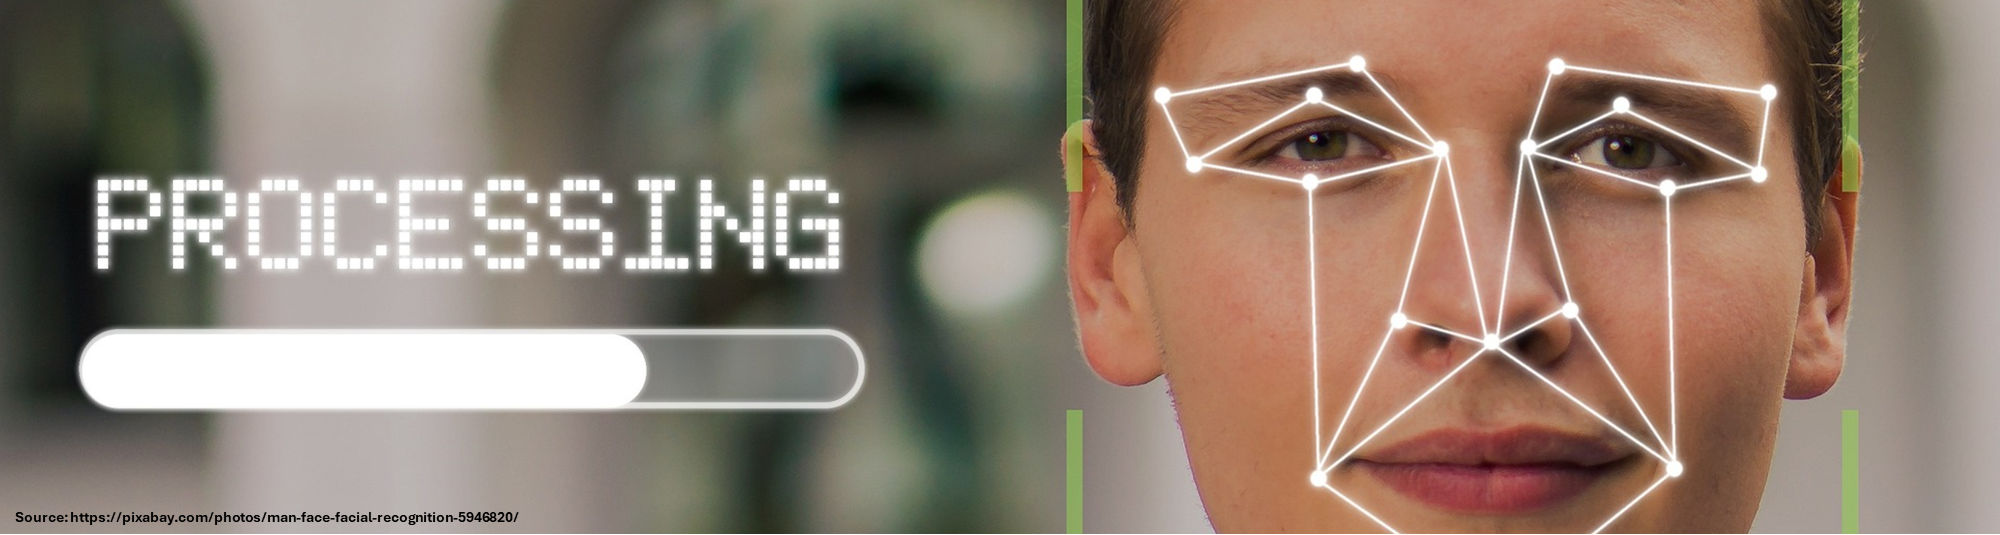

## **GOAL: To become acquainted with the implementation of Data Augmentation, Batch Normalization and Spatial Drop Out as mechanisms for reducing overfittinng in a CNN, as well as implementing Transfer Learning.**

----------------------
## **OBJECTIVE**
----------------------

We will deploy Data Augmentation, Batch Normalization and Spatial Drop Out. Additionally, we will exemplify the implememntation of Transfer Learning, adapting a pre-trained (VGG16) to a Dense Network to optimize a classification model based on a Convolutional Neural Network.

---------------------

## **CONTEXT**

Image classification has become less complex with deep learning and the availability of larger datasets and computational resources. The convolutional neural network is the most popular and widely used image classification technique in recent times.

FOOD@AImages is a stock photography company and an online source of images available for individuals and businesses to download. Photographers worldwide upload food-related images to the stock photography agency every day. Given the high volume of images uploaded daily, it would be difficult for anyone to tag the images manually.

FOOD@AImages has decided to use only three categories of food (Bread, Soup, and Vegetables-Fruits) for now, and you, as a data scientist at Clicks, need to build a classification model using a dataset that helps tag images into different categories.

### *Dataset*

The dataset folder contains different images of food. The images are already divided into Training and Testing folders.

Each folder has three subfolders named Bread, Soup, and Vegetables-Fruits. These folders contain images of the respective classes.

**Instructions** for accessing the data through Google Colab:

Follow these steps:

1) Upload the file ***Food_Data.zip*** to your drive and unzip the folder using the code provided in the notebook.

2) Mount your Google Drive using the code below.

```
from google.colab import drive
drive.mount('/content/drive')
```

3) Now, you can read the dataset as mentioned in the code below.


## **INDEX**

1. Installing necessary packages and importing Libraries
2. Data Preparation
3. Deploying a baseline CNN and improving it.
4. Implementing Transfer learning


**Dataset**: ***Food_Data.zip*** This file should be copied to your Google Drive at the following location: /content/drive/MyDrive/


## **1. Installing necessary packages and importing Libraries**

In [ ]:
# We will use visualkeras to display the structure of the Network
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 45.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 # CV2 is an image-processing package
import seaborn as sns
import tensorflow as tf
import keras
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten # Importing the necessary routines for the different types of layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from google.colab.patches import cv2_imshow
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Importing all required submodules from Keras
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

Once you have uploaded the file Food_Data.zip into the root folder of your Google Drive (the root folder is the main home screen of Google Drive where you land immediately after logging in), you can unzip the set of images and prepare for training your model.

## **2. Data Preparation**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Let's now unzip the train and test images
!unzip "/content/drive/MyDrive/Food_Data.zip"

Archive:  /content/drive/MyDrive/Food_Data.zip
   creating: Food_Data/Testing/
   creating: Food_Data/Testing/Bread/
  inflating: Food_Data/Testing/Bread/0.jpg  
  inflating: Food_Data/Testing/Bread/1.jpg  
  inflating: Food_Data/Testing/Bread/10.jpg  
  inflating: Food_Data/Testing/Bread/100.jpg  
  inflating: Food_Data/Testing/Bread/101.jpg  
  inflating: Food_Data/Testing/Bread/102.jpg  
  inflating: Food_Data/Testing/Bread/103.jpg  
  inflating: Food_Data/Testing/Bread/104.jpg  
  inflating: Food_Data/Testing/Bread/105.jpg  
  inflating: Food_Data/Testing/Bread/106.jpg  
  inflating: Food_Data/Testing/Bread/107.jpg  
  inflating: Food_Data/Testing/Bread/108.jpg  
  inflating: Food_Data/Testing/Bread/109.jpg  
  inflating: Food_Data/Testing/Bread/11.jpg  
  inflating: Food_Data/Testing/Bread/110.jpg  
  inflating: Food_Data/Testing/Bread/111.jpg  
  inflating: Food_Data/Testing/Bread/112.jpg  
  inflating: Food_Data/Testing/Bread/113.jpg  
  inflating: Food_Data/Testing/Bread/114.jp

### **Reading the Training Data**

In [ ]:
# Storing the training path in a variable called DATADIR and storing the unique categories/labels in a list.

DATADIR = "/content/Food_Data/Training"                                        # Path to the training data after unzipping.
CATEGORIES = ["Bread","Soup","Vegetable-Fruit"]                                # Storing all categories in the variable CATEGORIES
IMG_SIZE=150                                                                   # Defining the image size to 150.

In [ ]:
# Here we will use a custom function, create_training_data(), to extract images from the directory.
training_data = []                                                             # Creating and empty list to store training data

""" Below is defined a function called create_training_data().
When called, it will load, resize, and store all images from
specified categories into training_data."""

def create_training_data():
    for category in CATEGORIES:                                                # Here, the function "create_training_data" iterates through each category in the list CATEGORIES.
        path = os.path.join(DATADIR,category)                                  # This line combines the directory path DATADIR with the current category. DATADIR is the folder that contains subfolders named by categories ("bread", "Soup" and "Vegetable-Fruit").
        class_num = category                                                   # This line sets class_num to the current category. class_num is used as the label for each image in that category.
        for img in os.listdir(path):                                           # This iterates over each image file in the directory specified by path. Then, os.listdir(path) returns a list of all file names in that directory.
          img_array = cv2.imread(os.path.join(path,img))                       # Here, cv2.imread() reads the image file located at os.path.join(path, img), which combines the path to the category folder with the image file name. img_array now contains the pixel data for the image.
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))                # This resizes the image to a square shape of IMG_SIZE by IMG_SIZE pixels (already defined above, and = 150) using cv2.resize(). This step standardizes the input size for training.
          training_data.append([new_array,class_num])                          # This line appends a list containing the resized image (new_array) and its label (class_num) to training_data.
create_training_data()                                                         # Finally, this line runs the function and populates the training_data list with all images from the specified categories, each labeled with its respective class.

In [ ]:
training_data[0]

[array([[[ 21,  55,  68],
         [ 18,  51,  64],
         [ 20,  49,  63],
         ...,
         [ 64,  91, 113],
         [ 65,  87, 113],
         [ 65,  80, 112]],
 
        [[ 24,  56,  69],
         [ 19,  51,  64],
         [ 24,  53,  67],
         ...,
         [ 58,  88, 113],
         [ 58,  83, 109],
         [ 58,  80, 108]],
 
        [[ 29,  58,  72],
         [ 29,  58,  72],
         [ 24,  53,  67],
         ...,
         [ 62,  92, 119],
         [ 58,  85, 112],
         [ 55,  80, 106]],
 
        ...,
 
        [[108, 123, 164],
         [ 47,  57, 110],
         [ 30,  40,  99],
         ...,
         [ 18,  31, 109],
         [ 34,  45, 110],
         [ 38,  47, 103]],
 
        [[ 20,  27,  74],
         [ 36,  42,  98],
         [ 33,  41, 100],
         ...,
         [ 41,  59, 150],
         [ 47,  70, 142],
         [ 50,  74, 134]],
 
        [[ 36,  37,  87],
         [ 17,  18,  75],
         [ 93, 100, 157],
         ...,
         [ 24,  38, 155],
  

### **Reading the Test Data**

The same function is applied to create the test data.

In [ ]:
DATADIR_test = "/content/Food_Data/Testing"                                    # Path to the training data after unzipping.
CATEGORIES =  ["Bread","Soup","Vegetable-Fruit"]                               # Storing all categories in the variable CATEGORIES
IMG_SIZE=150                                                                   # Defining the image size to 150.

In [ ]:
testing_data = []
def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR_test,category)
        class_num = category
        for img in os.listdir(path):
          img_array = cv2.imread(os.path.join(path,img))
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
          testing_data.append([new_array,class_num])
create_testing_data()

****Let’s visualize random images from each of the three classes.****

In [ ]:
# These three lines below create separate lists to store the file names of images for each category.

"""Each line is a list comprehension used to create a list of file names (fn) in a specified directory. Let's see in detail:

What is os.listdir(f'{DATADIR}/{CATEGORIES[0]}')? os.listdir() is a function from Python's os module that lists all files and directories
in a given directory path.

What is f'{DATADIR}/{CATEGORIES[0]}'? constructs the path by joining the DATADIR (a main directory) with the first category name from CATEGORIES.
This path points to the directory containing images for the first category ("Bread" if CATEGORIES[0] is "Bread").
If, for example, DATADIR is '/images' and CATEGORIES[0] is 'Bread', then the path becomes '/images/Bread'.

So, what is [fn for fn in os.listdir(...)]?
This syntax creates a list by iterating over each item returned by os.listdir().
For each item fn (file name) in the list produced by os.listdir(...), add fn to the list bread_imgs.
fn represents each file name in the directory '/images/Bread' (because CATEGORIES selected is "0").
Result:

So the first line creates a list of file names, bread_imgs, containing all files in the specified Bread directory.
So bread_imgs will hold the names of all images in that directory.
The second and third line will do tge same for soups "[1]" and vegetables and fruits "[2]" """

bread_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[0]}') ]
soup_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[1]}')]
veg_fruit_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[2]}') ]

""" The three below lines use random selection to pick 3 unique file names from each category list.
- np.random.choice: This function from NumPy is used to select random items from an array or list.
- 3: This specifies that 3 items should be randomly selected from bread_imgs and the other lists.
- replace=False: This parameter means that each selected item will be unique."""

# Seleccionando aleatoriamente 3 imágenes de cada categoría.
select_bread = np.random.choice(bread_imgs, 3, replace = False)
select_soup = np.random.choice(soup_imgs, 3, replace = False)
select_veg_fruit = np.random.choice(veg_fruit_imgs, 3, replace = False)

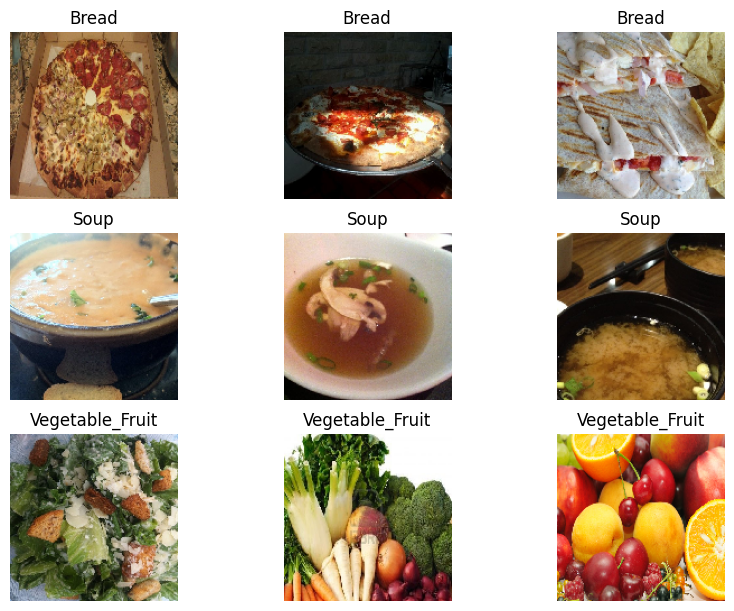

In [ ]:
# Let's visualize here 3 images from each category along with respective labels.

"""This code creates a 4x3 grid of images and displays three randomly selected
images from each of three categories: "Bread," "Soup," and "Vegetables-Fruits."""

fig = plt.figure(figsize = (10,10))                                            # This line initializes a figure for plotting with a size of 10x10 inches.

# This loop iterates 9 times to display a total of 9 images in the grid (3 images for each category).
for i in range(9):
    if i < 3:                                                                  # For the first 3 iterations (i = 0, 1, 2):
        fp = f'{DATADIR}/{CATEGORIES[0]}/{select_bread[i]}'                    # fp (file path) is set to the path of the i-th image in select_bread, which contains randomly selected "Bread" images.
        label = 'Bread'                                                        # label is set to 'Bread' for these images.
    if i>=3 and i<6:                                                           # For the next 3 iterations (i = 3, 4, 5):
        fp = f'{DATADIR}/{CATEGORIES[1]}/{select_soup[i-3]}'                   # fp is set to the i-3-th image in select_soup, which contains "Soup" images. The i-3 adjustment ensures indexing starts from 0 within this subset.
        label = 'Soup'                                                         # label is set to 'Soup'
    if i>=6 and i<9:                                                           # For the final 3 iterations (i = 6, 7, 8):
        fp = f'{DATADIR}/{CATEGORIES[2]}/{select_veg_fruit[i-6]}'              # fp is set to the i-6-th image in select_veg_fruit, which contains "Vegetable-Fruit" images. The i-6 adjustment resets indexing to start from 0 for this subset.
        label = 'Vegetable_Fruit'                                              # label is set to 'Vegetable_Fruit'
    ax = fig.add_subplot(4, 3, i+1)                                            # Adds a subplot to the figure in a 4x3 grid, placing each image in its respective position (i+1 is the subplot index, starting at 1).


    fn = image.load_img(fp, target_size = (150,150))                           # This line loads the image from the file path fp and resizes it to 150x150 pixels.
    plt.imshow(fn)                                                             # This one displays the image on the subplot.
    plt.title(label)                                                           # This one sets the title of the subplot to the category name (Bread, Soup, or Vegetable_Fruit).
    plt.axis('off')                                                            # This hides the axis for a cleaner look.
plt.show()                                                                     # The last one displays the entire figure with the 4x3 grid of images, where each row has images from a specific category.

### **Data (image) pre-processing**

In [ ]:
# Let's now create the train and test list for the training and testing our model
X_train = []                                                                   # This empty list will store the features (image data) for the training set.
y_train = []                                                                   # This empty list will store the labels (categories) corresponding to each image in X_train.
np.random.shuffle(training_data)                                               # This line shuffles the training_data list in place, mixing up the order of images and their labels. Shuffling helps ensure that the training data is presented to the model in a random order. This reduces bias and helps prevent the model from overfitting.
for features,label in training_data:                                           # This loop iterates over each entry in training_data (already created), and contains pairs in the format [image_data, label].
    X_train.append(features)                                                   # Adds the image data (features) to the X_train list. This list will contain all the training images once the loop is complete.
    y_train.append(label)                                                      # Adds the label (category) to the y_train list. This list will contain the labels for all images in X_train.

array([[[ 0,  5,  4],
        [ 0,  5,  5],
        [ 0,  5,  4],
        ...,
        [ 2,  4,  4],
        [ 2,  4,  4],
        [ 2,  4,  4]],

       [[ 0,  4,  3],
        [ 0,  5,  4],
        [ 0,  5,  4],
        ...,
        [ 3,  5,  5],
        [ 2,  4,  4],
        [ 2,  4,  4]],

       [[ 1,  6,  5],
        [ 1,  5,  4],
        [ 1,  5,  6],
        ...,
        [ 3,  5,  5],
        [ 2,  4,  4],
        [ 4,  6,  6]],

       ...,

       [[ 4, 13, 23],
        [ 1, 10, 20],
        [ 3, 12, 22],
        ...,
        [ 2,  5, 13],
        [ 2,  5, 13],
        [ 2,  5, 13]],

       [[ 0,  8, 18],
        [ 0,  7, 17],
        [ 0,  7, 17],
        ...,
        [ 1,  5, 13],
        [ 0,  2, 10],
        [ 0,  3, 11]],

       [[ 0,  7, 17],
        [ 2, 10, 20],
        [ 5, 14, 24],
        ...,
        [ 2,  4, 13],
        [ 2,  4, 13],
        [ 1,  4, 12]]], dtype=uint8)
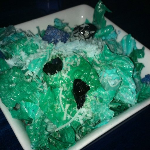

In [ ]:
X_train[5]

In [ ]:
y_train[5]

'Vegetable-Fruit'

We do the same for the test sample.

In [ ]:
X_test = []
y_test = []

np.random.shuffle(testing_data)
for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)

array([[[ 54,  65,  88],
        [ 49,  62,  85],
        [ 49,  66,  85],
        ...,
        [195, 243, 247],
        [194, 242, 246],
        [195, 242, 246]],

       [[ 49,  60,  87],
        [ 48,  62,  85],
        [ 50,  66,  89],
        ...,
        [197, 246, 249],
        [195, 243, 247],
        [194, 241, 245]],

       [[ 52,  64,  92],
        [ 50,  61,  88],
        [ 57,  69,  93],
        ...,
        [191, 239, 243],
        [195, 243, 247],
        [195, 242, 246]],

       ...,

       [[212, 252, 251],
        [212, 251, 249],
        [220, 255, 254],
        ...,
        [ 89, 132, 141],
        [133, 167, 170],
        [145, 169, 171]],

       [[181, 237, 238],
        [194, 248, 248],
        [201, 252, 249],
        ...,
        [129, 160, 162],
        [152, 174, 173],
        [127, 142, 141]],

       [[124, 185, 187],
        [161, 218, 219],
        [185, 237, 237],
        ...,
        [142, 167, 163],
        [148, 168, 163],
        [ 17,  33,  31]]], dtype=uint8)
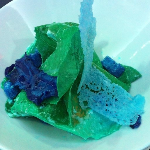

In [ ]:
X_test[5]

In [ ]:
y_test[5]

'Vegetable-Fruit'

In [ ]:
# Finally, we convert the y lists into DataFrame
y_train = pd.DataFrame(y_train, columns=["Label"],dtype=object)
y_test = pd.DataFrame(y_test, columns=["Label"],dtype=object)

### **Exploratory Data Analysis**

Let's implement a quick exploratory analysis of our current labels in datasets.

In [ ]:
# Converting the list into a *DataFrame* and looking at the number of labels for each
# category for y_train

count=y_train.Label.value_counts()
print(count)
print('*'*10)
count=y_train.Label.value_counts(normalize=True)
print(count)

Label
Soup               1500
Bread               994
Vegetable-Fruit     709
Name: count, dtype: int64
**********
Label
Soup               0.468311
Bread              0.310334
Vegetable-Fruit    0.221355
Name: proportion, dtype: float64


We have a majority for soups, while bread and vegetables/fruits account for 31% and 22%, respectively. This imbalanced data may affect the predictive capability of our model.

In [ ]:
# For model usability, we assess X_train and X_test as NumPy arrays.
X_train= np.array(X_train)
X_test= np.array(X_test)

In [ ]:
X_train.shape

(3203, 150, 150, 3)

**PELASE, CONSIDER THIS:**

The images ARE *Numpy* arrays, which can be observed from the values generated in *X_train* earlier. Therefore, it is possible to perform all preprocessing operations and build our *CNN* model directly using *Numpy* arrays. Thus, even if the data is provided in the form of *Numpy* arrays instead of images, we can use them to work on our model.




**Normalizing the data**

In neural networks, it is always recommended to **normalize the feature inputs**. Normalization provides the following benefits during the training of a neural network model:

1. **Normalization speeds up training and reduces the chances of getting stuck in local optima.**
2. In deep neural networks, **normalization helps prevent issues with exploding gradients.** The exploding gradient problem occurs when large error gradients accumulate, resulting in excessively large updates to the neural network model's weights during training. This makes the model unstable and unable to learn from the training data.

As we know, **pixel values in images range from 0 to 255**; here, we are simply **dividing all pixel values by 255 to standardize all images and keep values between 0 and 1.**

In [ ]:
## Normalizing the image data.
X_train= X_train/255.0

### **Encoding the target variable**

As per the current structure for y_test and y_train, we need to encode them.

*Label Binarizer* is another technique used to encode target variables, which reduces sparsity compared to the *one hot encoder*. You can refer to the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).

For example:  
If we have 4 classes such as **"Good"**, **"Better"**, **"Okay"**, **"Bad"**.  
After applying *LabelBinarizer* to these 4 classes, the output will be in array form.  
* [1, 1, 0, 0] --------- Good  
* [0, 1, 0, 0] --------- Better  
* [0, 0, 1, 0] --------- Okay  
* [0, 0, 1, 1] --------- Bad  

Each class will be represented in array form.

OneHot Encoding would perform this:
* [1, 0, 0, 0] --------- Good  
* [0, 1, 0, 0] --------- Better  
* [0, 0, 1, 0] --------- Okay  
* [0, 0, 0, 1] --------- Bad

Creating a matrix with more 0's, (a sparse matrix).

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()                                                           # Storing the *LabelBinarizer* function in the variable *lb*.
y_train_e = lb.fit_transform(y_train)                                           # Applying *fit_transform* to the training target variable.
y_test_e = lb.transform(y_test)                                                 # Applying *transform* only to the test target variable.

In [ ]:
y_test_e[5]

array([0, 0, 1])

## **4. Deploying a baseline CNN and improving it.**

### **Baseline Convolutional Neural Network model (model)**

In [ ]:
# Clearing the Backend
from tensorflow.keras import backend
backend.clear_session()
# Setting the seed for random number generators to ensure we get the same result each time.
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing a *sequential* model.
model = Sequential()

# Adding the first convolutional layer with 64 filters and a kernel size of 3x3; 'same' padding provides the same output size as the input size.
# Input_shape denotes the input dimension of the images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(150,150,3)))

# Adding *max pooling* to reduce the output size of the first convolutional layer.
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# Flattening the output of the convolutional layer after *max pooling* to prepare it for creating dense connections.
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons.
model.add(Dense(100, activation='relu'))

# Adding the output layer with 10 neurons and *softmax* activation functions as this is a multiclass classification problem.
model.add(Dense(3, activation='softmax'))

# Using the SGD optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compiling the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 38, 38, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 38, 38, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 19, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 11552)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │       1,155,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,185,107 (4.52 MB)

 Trainable params: 1,185,107 (4.52 MB)

 Non-trainable params: 0 (0.00 B)

1. If the problem has three classes to predict, then the neurons in the output layer will be 3.

**model.add(Dense(3, activation="softmax"))**

2. If the problem has ten classes to predict, then the neurons in the output layer will be 10.

**model.add(Dense(10, activation="softmax"))**

As we can see in the previous summary, this CNN model will train and learn **1,185,107 parameters (weights and biases)**.

Now we will compile and train the model using the training data. Here, we are using the loss function - categorical_crossentropy since this is a multi-class classification problem. We will attempt to minimize this loss in each iteration using our chosen optimizer. Additionally, we are selecting accuracy as the metric to measure the model's performance.

Epoch 1/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.4583 - loss: 1.0672 - val_accuracy: 0.4891 - val_loss: 1.0854
Epoch 2/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4999 - loss: 1.0472 - val_accuracy: 0.4891 - val_loss: 1.0387
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4675 - loss: 1.0512 - val_accuracy: 0.4891 - val_loss: 1.0431
Epoch 4/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4749 - loss: 1.0261 - val_accuracy: 0.4891 - val_loss: 1.0913
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4642 - loss: 1.0703 - val_accuracy: 0.4891 - val_loss: 1.0192
Epoch 6/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4658 - loss: 1.0431 - val_accuracy: 0.4891 - val_loss: 1.0186
Epoch 7/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4647 - loss: 1.0392 - val_accuracy: 0.4611 - val_loss: 1.0042
Epoch 8/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4706 - loss: 1.0220 - val_accuracy: 0.5078 - 

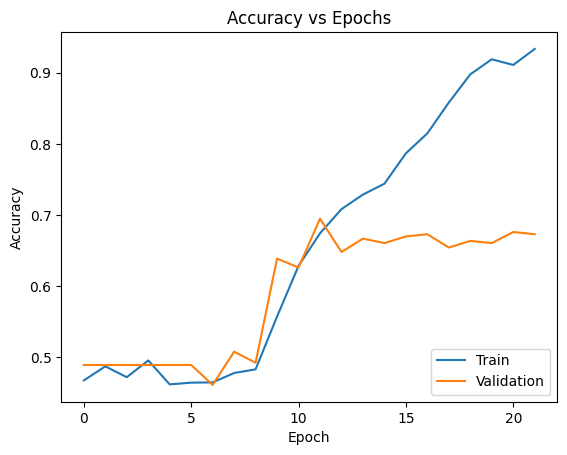

In [ ]:
# Fitting the model with 30 epochs and a `validation_split` of 10%.

import time                                                                     # Importing the time module
early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.00001, restore_best_weights=True)

start_time = time.time()
history=model.fit(X_train,
          y_train_e,
          epochs=30,
          batch_size=32,
          validation_split=0.10,
          callbacks=[early_stopping])

end_time = time.time()
training_time = end_time - start_time
print ('======================================================================================================================')
print(f"Time taken to train the model: {training_time:.2f} seconds")
print ('======================================================================================================================')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

According to the above graph, it appears that the model is overfitting. Let's try using Dropout in the next model.

In [ ]:
# Now let's calculate Accuracy for Test (X and y)
model.evaluate(X_test,(y_test_e))

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5566 - loss: 139.5807


[138.22476196289062, 0.5612431168556213]

In [ ]:
# Predicting en Test
y_test_pred_ln = model.predict(X_test)
y_test_pred_classes_ln = np.argmax(y_test_pred_ln, axis=1)
normal_y_test = np.argmax(y_test_e, axis=1)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


Since we converted the target variable into a NumPy array using `LabelBinarizer`, we are now converting the target variable back to its original form using the `numpy.argmax()` function, which returns the indices of the maximum element in the array along a specific axis. This original form of the target variable will be used to calculate accuracy and plot the confusion matrix.

Accuraccy for test:  0.5612431444241316


<Axes: >

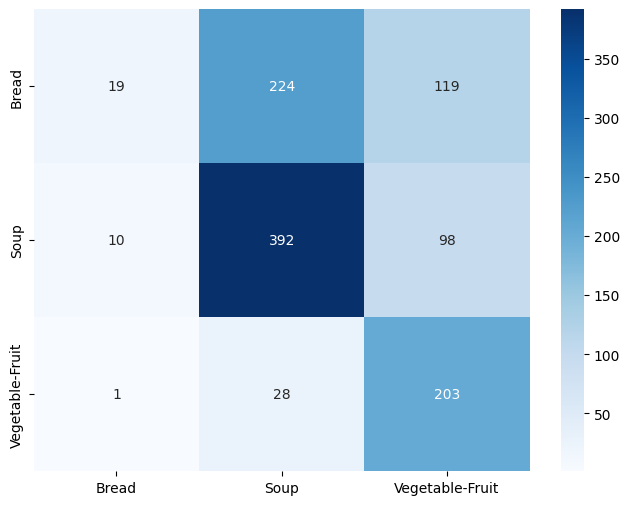

In [ ]:
# Accuracy on Test
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuraccy for test: ', accuracy_score((normal_y_test), y_test_pred_classes_ln))

cf_matrix = confusion_matrix(normal_y_test, y_test_pred_classes_ln)

# Matriz de confusión por valor verdadero de cada categoría.
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True, fmt='d', cmap='Blues')

The model is achieving > 60% accuracy on the test data.

Let's visualize the model in a stylized form.

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


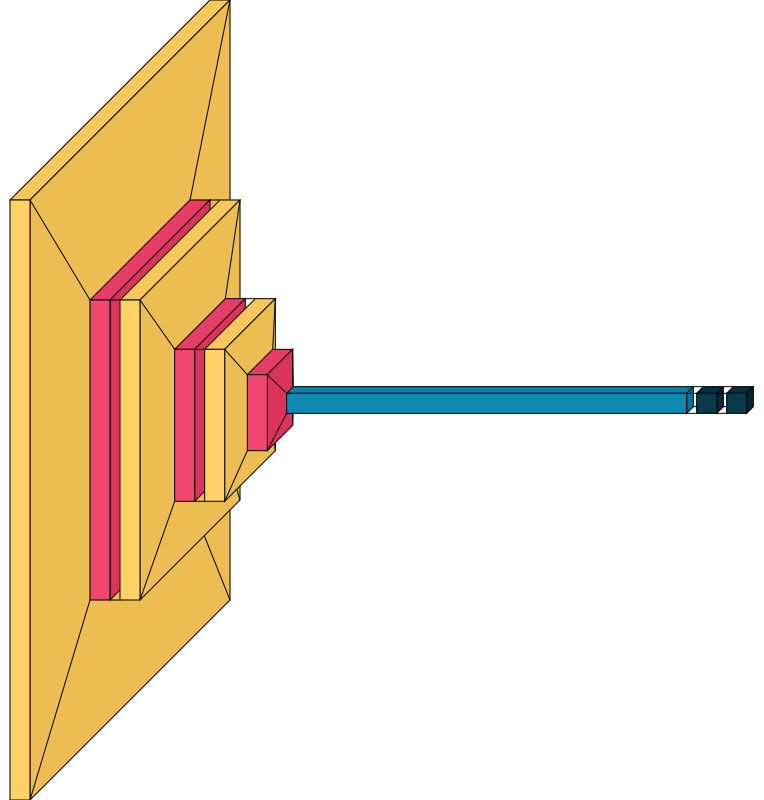

In [ ]:
import visualkeras

from collections import defaultdict

""" The next color codes will matcg the type of layers in the model. """

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'blue'
color_map[Flatten]['fill'] = 'teal'

visualkeras.layered_view(model)

The orange layers represents the convolutional ones. Red indicates the Maxpooling layers, teal represents the flatten and the blue ones, the dense layers.

### **Improved Convolutional Neural Network model (model_3)**

Let's try building another CNN model with more layers added to the model.


In [ ]:
# Clearing the Backend
from tensorflow.keras import backend
backend.clear_session()
# Setting the seed for random number generators to ensure we get the same result each time.
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing a sequential model.
model_3 = Sequential()
# Adding the first convolutional layer with 256 filters, kernel size 5x5, ReLU activation, and 'same' padding, which provides an output size equal to the input size.
# `input_shape` denotes the dimensions of the input images.
model_3.add(Conv2D(filters = 256, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (150,150,3)))
# Adding Max Pooling to reduce the output size of the first convolutional layer.
model_3.add(MaxPool2D(pool_size=(2,2)))

# Adding the second convolutional layer with 128 filters, kernel size 3x3, and ReLU activation function.
model_3.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
# Adding max pooling to reduce the size of output of first conv layer
model_3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Adding the third convolutional layer with 64 filters, kernel size 3x3, and ReLU activation function.
model_3.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
# Adding Max Pooling to reduce the output size of the convolutional layer.
model_3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# Adding Dropout to randomly deactivate 30% of feature maps and reduce overfitting.
model_3.add(Dropout(0.3))

# Adding the third convolutional layer with 32 filters, kernel size 3x3, and ReLU activation function.
model_3.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
# Adding Max Pooling to reduce the output size of the convolutional layer.
model_3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# Adding Dropout to randomly deactivate 30% of feature maps and reduce overfitting.
model_3.add(Dropout(0.3))

# Flattening the three-dimensional output of the convolutional layer after Max Pooling to prepare it for creating dense connections.
model_3.add(Flatten())
# Adding the first fully connected dense layer with 64 neurons.
model_3.add(Dense(64, activation = "relu"))
# Adding Dropout to randomly deactivate 50% of neurons and reduce overfitting
model_3.add(Dropout(0.5))
# Adding the second fully connected dense layer with 32 neurons.
model_3.add(Dense(32, activation = "relu"))
# Adding Dropout to randomly deactivate 50% of neurons and reduce overfitting.
model_3.add(Dropout(0.5))

# Adding the output layer with 4 neurons and softmax activation function, as this is a multi-class classification problem with 3 classes.
model_3.add(Dense(3, activation = "softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = Adam(learning_rate=0.001)
model_3.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 256)       │          19,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 128)         │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 9, 9, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2592)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         165,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,099,171 (4.19 MB)

 Trainable params: 1,099,171 (4.19 MB)

 Non-trainable params: 0 (0.00 B)

As we can see in the previous summary, this CNN (model_2) model will train and learn **1,099,171 parameters (weights and biases)**.

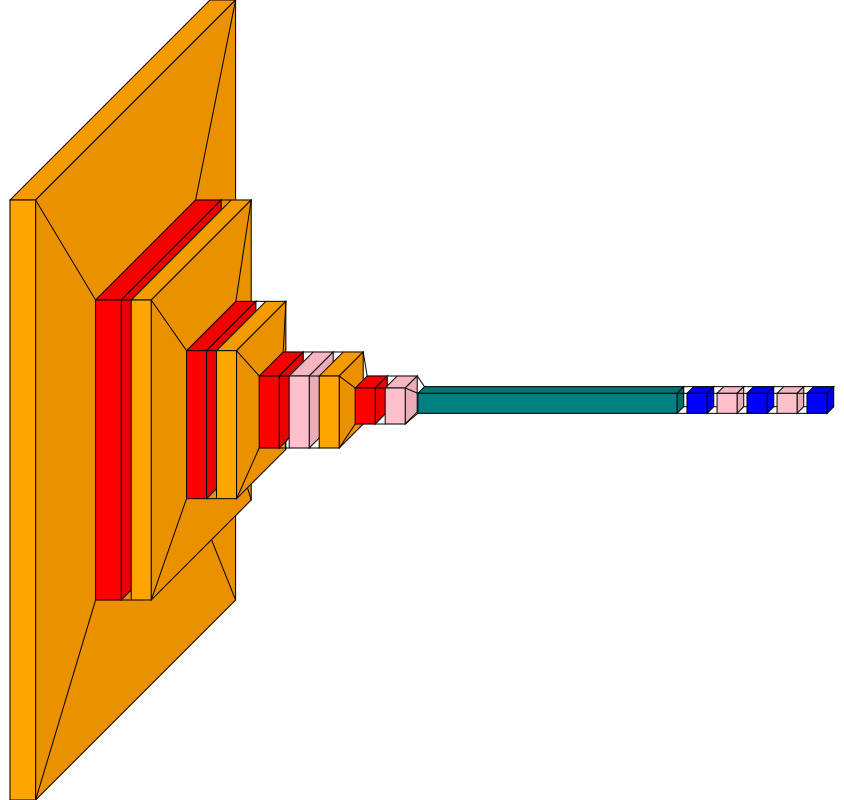

In [ ]:
# Visualizing a stylized structure of the model model_2

from collections import defaultdict

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'blue'
color_map[Flatten]['fill'] = 'teal'

visualkeras.layered_view(model_3, color_map=color_map )

For this model_3, the orange layers represents the convolutional ones. Red indicates the Maxpooling layers, teal represents the flatten, blue ones, the dense layers and pinks drop out layers.

Epoch 1/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 48s 336ms/step - accuracy: 0.4277 - loss: 1.0954 - val_accuracy: 0.4891 - val_loss: 1.0549
Epoch 2/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 49s 149ms/step - accuracy: 0.4649 - loss: 1.0636 - val_accuracy: 0.4891 - val_loss: 1.0466
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 21s 153ms/step - accuracy: 0.4674 - loss: 1.0546 - val_accuracy: 0.4891 - val_loss: 1.0469
Epoch 4/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 20s 148ms/step - accuracy: 0.4652 - loss: 1.0543 - val_accuracy: 0.4891 - val_loss: 1.0161
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step - accuracy: 0.4678 - loss: 1.0689 - val_accuracy: 0.4891 - val_loss: 1.0457
Epoch 6/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 14s 150ms/step - accuracy: 0.4660 - loss: 1.0554 - val_accuracy: 0.4891 - val_loss: 1.0376
Epoch 7/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 21s 151ms/step - accuracy: 0.4641 - loss: 1.0383 - val_accuracy: 0.4891 - val_loss: 1.0103
Epoch 8/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 20s 148ms/step - accuracy: 0.4661 - loss: 1.0429 - val_accu

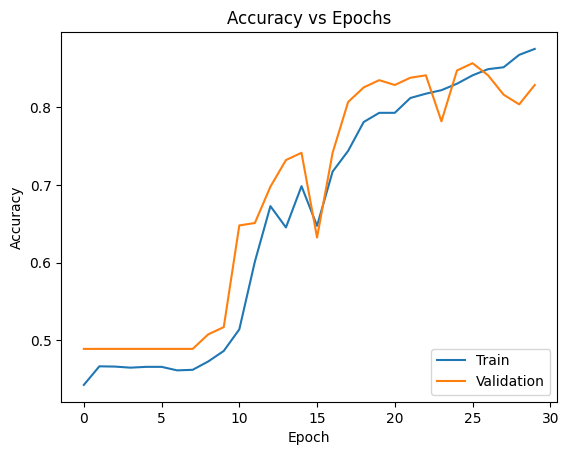

In [ ]:
# MODEL_3
# Fitting the model with 30 epochs and a `validation_split` of 10%.

import time                                                                     # Importing the time module
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

start_time = time.time()

history_3=model_3.fit(X_train,
          y_train_e,
          epochs=30,
          batch_size=32,
          validation_split=0.10,
          callbacks=[early_stopping])

end_time = time.time()
training_time = end_time - start_time
print ('======================================================================================================================')
print(f"Time taken to train the model_3: {training_time:.2f} seconds")
print ('======================================================================================================================')
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

The training and validation accuracies seem to be good. Let's calculate the accuracy on the test data. Time required increased significantly, as we trained a more complex model. Let's see the results on test.

35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.7625 - loss: 64.6559
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step
0.7650822669104205
              precision    recall  f1-score   support

           0       0.78      0.57      0.66       362
           1       0.80      0.83      0.82       500
           2       0.70      0.91      0.79       232

    accuracy                           0.77      1094
   macro avg       0.76      0.77      0.76      1094
weighted avg       0.77      0.77      0.76      1094



<Axes: >

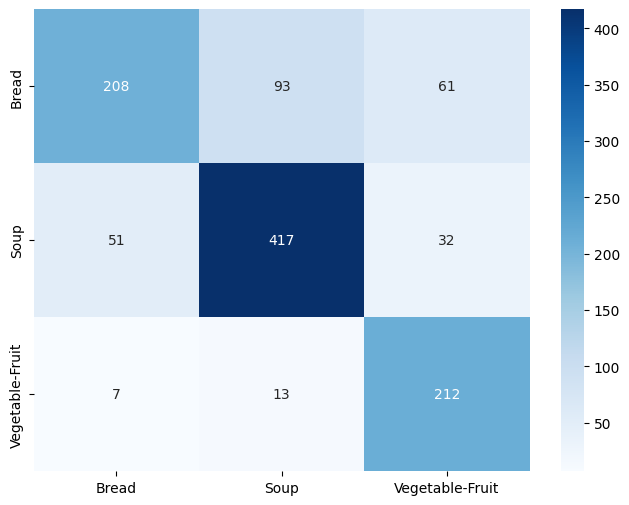

In [ ]:
model_3.evaluate(X_test,y_test_e)
y_test_pred_ln3 = model_3.predict(X_test)
y_test_pred_classes_ln3 = np.argmax(y_test_pred_ln3, axis=1)
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(normal_y_test, y_test_pred_classes_ln3))
cf_matrix = confusion_matrix(normal_y_test, y_test_pred_classes_ln3)

from sklearn.metrics import classification_report
print(classification_report((normal_y_test), y_test_pred_classes_ln3))


# Confussion Matrix for model_3
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True, fmt='d', cmap='Blues')

## **Prediction**

Let's make predictions using the best model, which is `model_3`, by plotting a random image from the `X_test` data and checking if our best model predicts the image correctly or not.

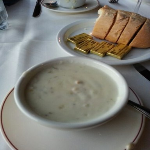

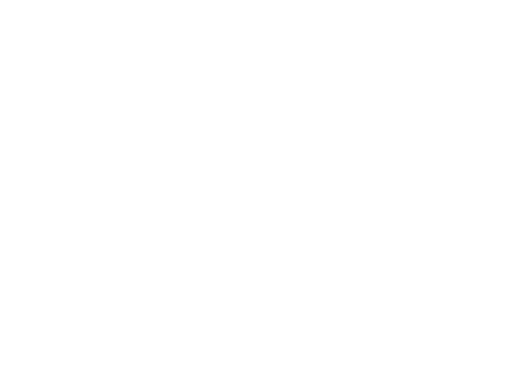

In [ ]:
# Displaying the test image for a random one: 11
cv2_imshow(X_test[11])
plt.axis('off')
plt.show()

In [ ]:
# Prediciendo la imagen de prueba con el mejor modelo y almacenando el valor de predicción en la variable `res`.
res=model_3.predict(X_test[11].reshape(1,150,150,3))
# Predicting the test image with the best model and storing the prediction value in the variable `res`.
i=np.argmax(res)
if(i == 0):
    print("Bread")
if(i==1):
    print("Soup")
if(i==2):
    print("Vegetable-Fruit")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
Soup


### **Conclusion**

1. As we have seen, the CNN model - 2 (model_3) was able to correctly predict the test image with a test accuracy of 76%.

2. **There is still room to improve the test accuracy of the chosen CNN model**. Different architectures and optimizers can be used to obtain a better food classifier.

3. Transfer learning can be applied to the dataset to improve accuracy.

#**Transfer Learning (VGG16) with Data Agumentation**
###**Creating a model using Transfer learning**


#### **Data Augmentation**

In most real-life case studies, it is usually challenging to collect a large number of images and then train CNNs. In such cases, one idea we can leverage is Data Augmentation. CNNs have the property of **translational invariance**, meaning they can recognize an object as an object, even when its appearance varies in some translational way. Considering this property, we can augment images using the following techniques:

1. **Horizontal Flip**: True/False  
2. **Vertical Flip**: True/False  
3. **Height Shift**: Value between 0 and 1  
4. **Width Shift**: Value between 0 and 1  
5. **Rotation**: Value between 0 and 180  
6. **Shear**: Value between 0 and 1  
7. **Zoom**: Value between 0 and 1

In [ ]:
# Let's implement data Augmentation

# Saving the paths for the training and test data
train_dir = "/content/Food_Data/Training"
test_dir  = "/content/Food_Data/Testing"

# All images should be rescaled by 1/255.
train_datagen = ImageDataGenerator(rescale=1. / 255.0,
                              horizontal_flip = True,
                              vertical_flip = False,
                              height_shift_range= 0.1,
                              width_shift_range=0.1,
                              rotation_range=20,
                              shear_range = 0.1,
                              zoom_range=0.1)
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

# Considering training images in batches of 20 using the `train_datagen` generator.
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

Found 3203 images belonging to 3 classes.
Found 1094 images belonging to 3 classes.


- Now, let's build a model using the concept of **Transfer Learning** with Data Augmentation. We will use a predefined architecture, **VGG16**, which was trained on the ImageNet dataset and placed second in the ImageNet competition in 2014. Below is a diagram of the VGG16 model.

- To train VGG16, we will directly use its convolutional and pooling layers and freeze their weights, meaning no training will be done on them. We will remove the fully connected layers already present and add our own fully connected layers for this binary classification task.

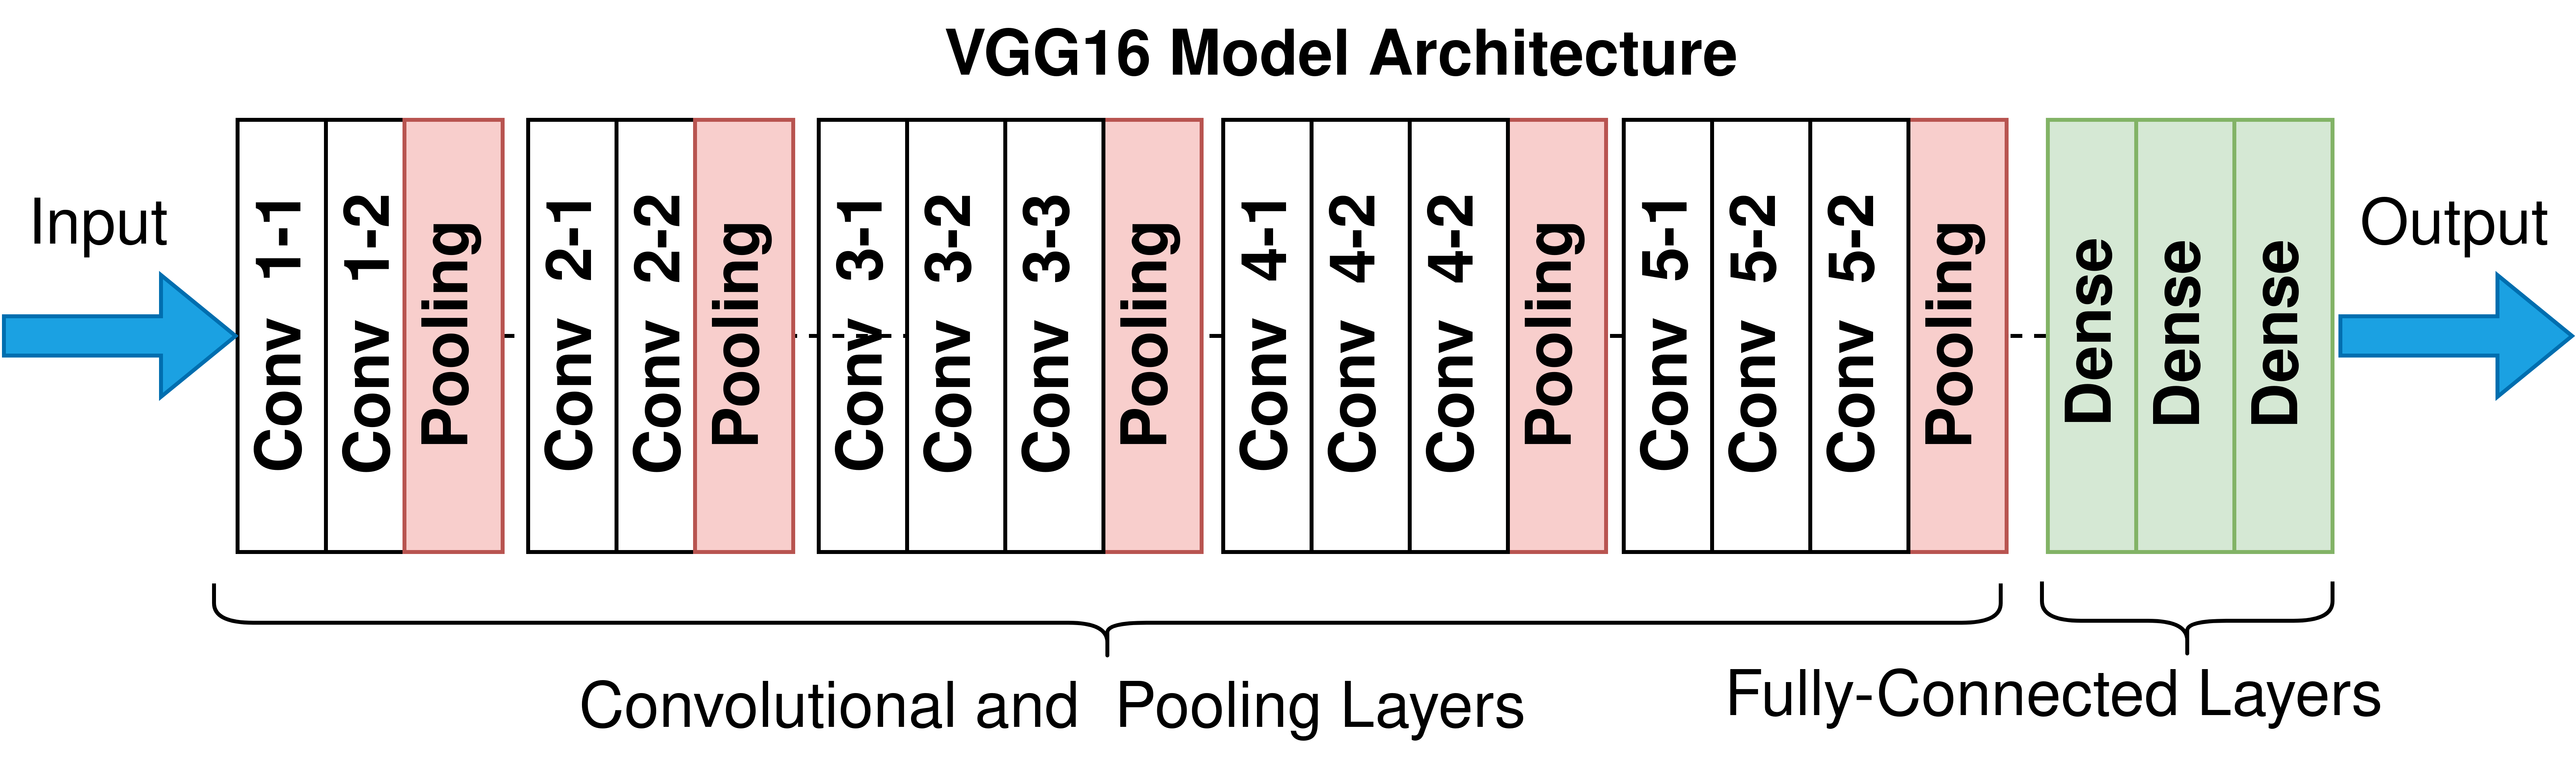

The following are the layers of the model:

Convolutional Layers = 13  
Pooling Layers = 5  
Dense Layers = 3  
Let's explore the layers in detail:

Input: Image with dimensions (224, 224, 3).  
* **Convolutional Layer Conv1:**
  Conv1-1: 64 filters  
  Conv1-2: 64 filters and Max Pooling  
  Image dimensions: (224, 224)  
* **Convolutional Layer Conv2:**
  Now, we increase the filters to 128  
  Input image dimensions: (112, 112)  
  Conv2-1: 128 filters  
  Conv2-2: 128 filters and Max Pooling  

* **Convolutional Layer Conv3:**
  Again, we double the filters to 256, and now add another convolutional layer  
  Input image dimensions: (56, 56)  
  Conv3-1: 256 filters  
  Conv3-2: 256 filters  
  Conv3-3: 256 filters and Max Pooling  

* **Convolutional Layer Conv4:**
  Similar to Conv3, but now with 512 filters  
  Input image dimensions: (28, 28)  
  Conv4-1: 512 filters  
  Conv4-2: 512 filters  
  Conv4-3: 512 filters and Max Pooling  

* **Convolutional Layer Conv5:**
  Same as Conv4  
  Input image dimensions: (14, 14)  
  Conv5-1: 512 filters  
  Conv5-2: 512 filters  
  Conv5-3: 512 filters and Max Pooling  

The output dimensions here are (7, 7).  
*At this point, we flatten the output of this layer to generate a feature vector.*

* **Dense Layer FC1:** 4096 nodes, generating a feature vector of size (1, 4096)

* **Dense Layer FC2:** 4096 nodes, generating a feature vector of size (1, 4096)

* **Dense Layer FC3:** 4096 nodes, generating 1000 channels for 1000 classes.

* This is then passed to a Softmax activation function.

**Output Layer**

Let's see the total of parameters to train for the VGG16 model

In [ ]:
# Loading the VGG16 model
model = VGG16(weights='imagenet')
# Resumen del modelo en su totalidad
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

The volume of parameters to caluclate, if we would train this model, ascends ti 138 million. But we will only use the convolutional layers. Let's see the size of these layers:

In [ ]:
# Obtaining only the convolutional layers for transfer learning.
transfer_layer = model.get_layer('block5_pool')
vgg_model = Model(inputs=model.input, outputs=transfer_layer.output)
vgg_model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

To remove the fully connected layers from the pre-trained model imported from Keras, we can specify an additional argument, **include_top**.

- **If we specify include_top = False, the model will be imported without the fully connected layers.** In this case, we won’t need to perform the previous steps of obtaining the last convolutional layer and creating a separate model.

- If we specify include_top = False, we also need to specify the shape of our input image.

- Keras includes this keyword argument because, typically, when importing a pre-trained CNN model, we don’t need the fully connected layers and train our own fully connected layers for our task.

Let's see:

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

We have only 14 million parameters to estimate for the convolutional layers. But if we use Transfer Learning, we should freeze the training for these parameters of the convolutional layers. Let's see:

In [ ]:
# Making all layers of the VGG model non-trainable, i.e., freezing them.
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
# We can review the status of these layers.
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_layer_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


Let's now construct a model using these pre-trained convolutional layers from VGG16.  

In [ ]:
# Resetting the backend
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Loading the VGG16 model with pretrained weights, excluding the top layers.
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

# Freezing the layers of VGG16.
for layer in vgg_model.layers:
    layer.trainable = False

# Flattening the output of VGG16.
x = Flatten()(vgg_model.output)

# Adding dense layers
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)

# Adding the output layer for predicting 3 classes.
output_layer = Dense(3, activation='softmax')(x)

# Creating the model (new_model)
new_model = Model(inputs=vgg_model.input, outputs=output_layer)

# Compiling the model
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Visualizing the summary
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,978,019 (57.14 MB)

 Trainable params: 263,331 (1.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


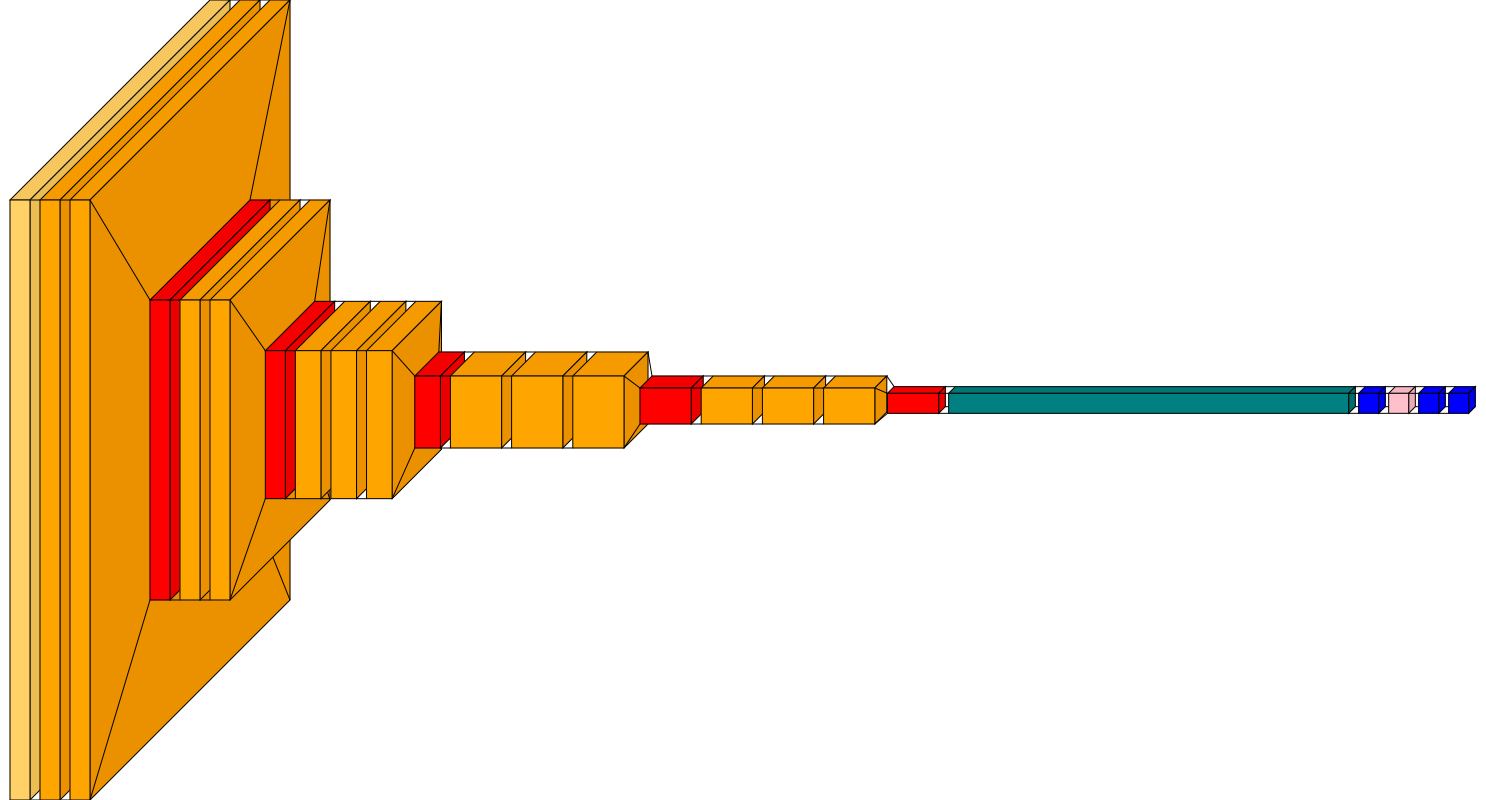

In [ ]:
# Visualizing a stylized structure of the model new_model

from collections import defaultdict

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'blue'
color_map[Flatten]['fill'] = 'teal'

visualkeras.layered_view(new_model, color_map=color_map )

In [ ]:
# Obtaining a single batch of random validation data to perform tests after each epoch.
# We will use this set as validation during the training
testX, testY = next(test_generator)                                             # next() is a built-in Python function that retrieves the next item from an iterator.
                                                                                # We created the test_generator object in tje Data Augmnentation section above.

We will implement Early Stopping again.

**Early stopping** is a technique similar to cross-validation where a portion of the training data is held out as validation data. When the performance on the validation data begins to deteriorate, the model will immediately stop training.
- **Monitor**: Quantity to monitor.
- **Mode**: One of {"auto", "min", "max"}. In "min" mode, training will stop when the monitored quantity has stopped decreasing; in "max" mode, it will stop when the monitored quantity has stopped increasing; in "auto" mode, the direction is inferred automatically from the monitored quantity's name.
- **Patience**: Number of epochs with no improvement after which training will stop.

The **ModelCheckpoint** callback is used along with training using `model.fit()` to save a model or weights (in a checkpoint file) at specified intervals so that the model or weights can be loaded later to resume training from the saved state.

Now let's train our model using the weighs and biases of the convolutional layers from VGG16.


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

start_time = time.time()

## Training our new_model or 30 epochs.
new_model_history = new_model.fit(train_generator,
                                  validation_data = (testX, testY),
                                  epochs=30,callbacks=[es, mc])

end_time = time.time()
training_time = end_time - start_time
print ('======================================================================================================================')
print(f"Time taken to train the new_model: {training_time:.2f} seconds")
print ('======================================================================================================================')


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.7466 - loss: 0.5727
Epoch 1: val_accuracy improved from -inf to 0.90000, saving model to best_model.keras
161/161 ━━━━━━━━━━━━━━━━━━━━ 46s 222ms/step - accuracy: 0.7471 - loss: 0.5719 - val_accuracy: 0.9000 - val_loss: 0.2883
Epoch 2/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.8935 - loss: 0.2821
Epoch 2: val_accuracy improved from 0.90000 to 0.95000, saving model to best_model.keras
161/161 ━━━━━━━━━━━━━━━━━━━━ 69s 185ms/step - accuracy: 0.8935 - loss: 0.2821 - val_accuracy: 0.9500 - val_loss: 0.1245
Epoch 3/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.9285 - loss: 0.2184
Epoch 3: val_accuracy improved from 0.95000 to 1.00000, saving model to best_model.keras
161/161 ━━━━━━━━━━━━━━━━━━━━ 42s 189ms/step - accuracy: 0.9285 - loss: 0.2185 - val_accuracy: 1.0000 - val_loss: 0.0420
Epoch 4/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.9152 - loss: 0.2320
Epoch 4: val_accuracy did not impro

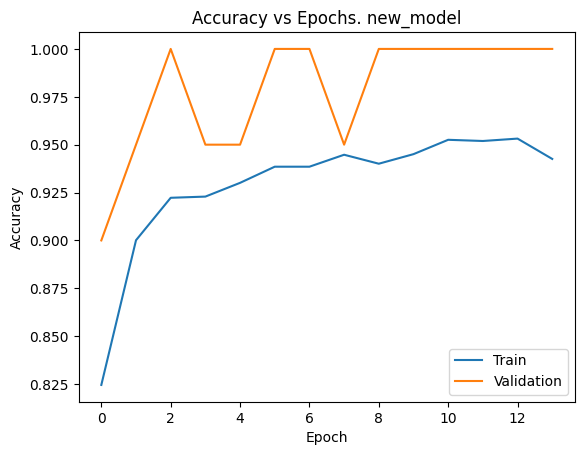

In [ ]:
plt.plot(new_model_history.history['accuracy'])
plt.plot(new_model_history.history['val_accuracy'])
plt.title('Accuracy vs Epochs. new_model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 208ms/step - accuracy: 0.9295 - loss: 0.2051
35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 149ms/step
              precision    recall  f1-score   support

           0       0.97      0.57      0.72       362
           1       0.91      0.94      0.93       500
           2       0.63      0.98      0.76       232

    accuracy                           0.83      1094
   macro avg       0.84      0.83      0.80      1094
weighted avg       0.87      0.83      0.82      1094



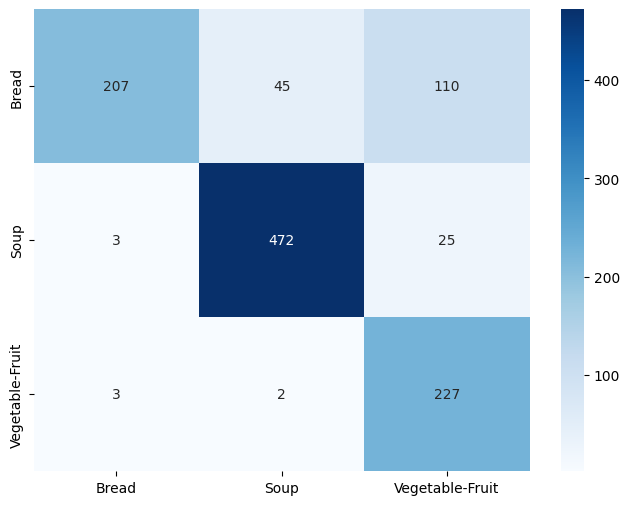

In [ ]:
# Evaluating in Test set
new_model.evaluate(test_generator)
y_test_pred_ln4 = new_model.predict(X_test)
y_test_pred_classes_ln4 = np.argmax(y_test_pred_ln4, axis=1)

import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(normal_y_test, y_test_pred_classes_ln4)

cf_matrix = confusion_matrix(normal_y_test, y_test_pred_classes_ln4)

# Confusion Matrix for "new_model"
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True, fmt='d', cmap='Blues')

# Classification report for new_model
from sklearn.metrics import classification_report
print(classification_report((normal_y_test), y_test_pred_classes_ln4))

### **Prediction for new_model**

Let us predict using the best model which is model_3 by plotting one random image from X_test data with variable and see if our best model is predicting the image correctly or not.

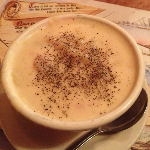

In [ ]:
# Plotting the test image
cv2_imshow(X_test[101])

In [ ]:
# Predicting the test image with the best model and storing the prediction value in the variable `res`.
res=new_model.predict(X_test[101].reshape(1,150,150,3))
# Applying `argmax` on the prediction to obtain the index of the highest value.
i=np.argmax(res)
if(i == 0):
    print("Bread")
if(i==1):
    print("Soup")
if(i==2):
    print("Vegetable-Fruit")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Soup


1. As we have seen, our pre-trained (new_model) was able to correctly predict the test image with an significant better Accuracy than the other models trained.

2. **There may still be room to improve the accuracy of the chosen CNN model**. Try adding one more dense layer to the VGG16 model and see if you can achieve a higher accuracy than the best model.

## **END OF THE BOOK**